In [5]:
import time
import requests
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def measure_latency(url):
    start = time.time()
    requests.get(url)
    end = time.time()
    return end - start

In [3]:
models = ['word2vec', 'mobert', 'unfrozen_bert']

In [4]:
latencies = {}
num_requests = 100
text = 'The quick brown fox jumps over the lazy dog'

for model in models:
    latencies[model] = []
    for i in range(num_requests):
        latencies[model].append(measure_latency(f'http://127.0.0.1:8000/get_emoji?text={text}&embedding_type={model}'))


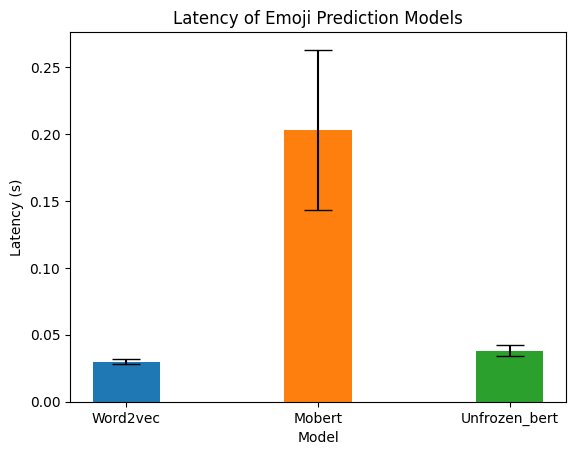

In [17]:
# Create a bar chart with the latencies and standard errors
fig, ax = plt.subplots()
index = np.arange(len(models))
bar_width = 0.35

for i, model in enumerate(models):
    plt.bar(index[i], np.mean(latencies[model]), bar_width, yerr=np.std(latencies[model]), label=model.capitalize())

# Make the x axis labels the model names
# Capitalize the first letter of each model name
plt.xticks(index, [model.capitalize() for model in models])
    
plt.xlabel('Model')
plt.ylabel('Latency (s)')
plt.title('Latency of Emoji Prediction Models')
plt.show()